# Eksploracja danych projekt

## Przygotowanie danych

In [5]:
!pip install wbgapi


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbgapi as wb
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', None)

In [25]:
# listy ze wskaźnikami

# wskaźniki skróty
all_indicators = ['NY.GDP.PCAP.PP.CD', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD',    'NV.AGR.TOTL.ZS', 'NE.IMP.GNFS.ZS', 'NE.EXP.GNFS.ZS', 'SP.DYN.LE00.IN', 'SH.IMM.IDPT',    'SH.DYN.NMRT', 'SH.HIV.1524.MA.ZS', 'SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SM.POP.NETM',    'SP.POP.0014.TO.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.TOTL.FE.ZS', 'SM.POP.REFG.OR',    'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS']
economic_indicators = ['NY.GDP.PCAP.PP.CD', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS', 'BX.KLT.DINV.CD.WD',    'NV.AGR.TOTL.ZS', 'NE.IMP.GNFS.ZS', 'NE.EXP.GNFS.ZS']
health_indicators = ['SP.DYN.LE00.IN', 'SH.IMM.IDPT',    'SH.DYN.NMRT', 'SH.HIV.1524.MA.ZS']
sociodemographic_indicators = ['SP.DYN.CDRT.IN', 'SP.DYN.TFRT.IN', 'SM.POP.NETM',    'SP.POP.0014.TO.ZS', 'SP.POP.65UP.TO.ZS', 'SP.POP.TOTL.FE.ZS', 'SM.POP.REFG.OR',    'SP.POP.GROW', 'SP.POP.TOTL', 'SP.URB.TOTL.IN.ZS']

# wskaźniki pełne nazwy
sociodemographic_indicators_full_name = ['Death rate, crude (per 1,000 people)', '	Fertility rate, total (births per woman)', 'Net migration', 'Population ages 0-14 (% of total population)', 'Population ages 65 and above (% of total population)', 'Population growth (annual %)', 'Population, female (% of total population)', 'Population, total', 'Refugee population by country or territory of origin', 'Urban population (% of total population)']
health_indicators_full_name = ['Immunization, DPT (% of children ages 12-23 months)', 'Life expectancy at birth, total (years)', '	Mortality rate, neonatal (per 1,000 live births)', 'Prevalence of HIV, male (% ages 15-24)']
economic_indicators_full_name = ['Agriculture, forestry, and fishing, value added (% of GDP)', 'Exports of goods and services (% of GDP)', 'Foreign direct investment, net inflows (BoP, current US$)', 'GDP per capita, PPP (current international $)', 'Imports of goods and services (% of GDP)', '	Inflation, consumer prices (annual %)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']
    


In [26]:
all_countries = ['AFE', 'AFW', 'ALB', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL', 'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GEO', 'GHA', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN', 'ITA', 'JAM', 'KAZ', 'KEN', 'KGZ', 'KHM', 'LAO', 'LIC', 'LKA', 'LTU', 'LVA', 'MAR', 'MDA', 'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MNG', 'MRT', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA', 'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'VNM', 'WLD', 'ZAF', 'ZMB']

In [27]:
wb.series.info(economic_indicators)

id,value
NV.AGR.TOTL.ZS,"Agriculture, forestry, and fishing, value added (% of GDP)"
NE.EXP.GNFS.ZS,Exports of goods and services (% of GDP)
BX.KLT.DINV.CD.WD,"Foreign direct investment, net inflows (BoP, current US$)"
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NE.IMP.GNFS.ZS,Imports of goods and services (% of GDP)
FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)"
SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
,7 elements


In [49]:
def data_frame(indicators, countries):
    socio_dict = dict(zip(sociodemographic_indicators ,sociodemographic_indicators_full_name))
    health_dict = dict(zip(health_indicators,health_indicators_full_name))
    economic_dict = dict(zip(economic_indicators,economic_indicators_full_name))
    mappings = socio_dict | health_dict | economic_dict
    df = wb.data.DataFrame(indicators, economy=countries, time=range(1992,2021), labels=True)
    df = df.rename(columns=lambda x: x.replace('YR', ''))
    id_vars=[f'{x}' for x in range(1992,2021)]

    df_melted = df.reset_index(level=['economy','series'])
    df_melted['series_name'] = df_melted['series'].replace(mappings)
    return df_melted

In [29]:
df = wb.data.DataFrame(all_indicators, all_countries, time=range(1990,2021))
df

YR1990        YR1991        YR1992  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  8.867306e+07  1.241969e+09  6.523250e+08   
        FP.CPI.TOTL.ZG     1.245791e+01  1.767810e+01  1.616761e+01   
        NE.EXP.GNFS.ZS     2.061089e+01  1.875437e+01  2.183226e+01   
        NE.IMP.GNFS.ZS     1.966854e+01  1.948130e+01  2.119271e+01   
        NV.AGR.TOTL.ZS     1.751717e+01  1.898274e+01  1.248433e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.692339e+00  2.661017e+00  2.626364e+00   
        SP.POP.GROW        2.571365e+00  2.493438e+00  2.430372e+00   
        SP.POP.TOTL        7.686401e+06  7.880466e+06  8.074337e+06   
        SP.POP.TOTL.FE.ZS  5.168522e+01  5.173123e+01  5.177919e+01   
        SP.URB.TOTL.IN.ZS  3.940700e+01  3.898900e+01  3.851400e+01   

                                 YR1993        YR1994        YR1995  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  8.395097e+08  1.187865e+09  2.662959e+09   
        FP.CPI.TOTL.ZG     1.313566e+01  1.485281e+01  1.228859e+01   
        NE.EXP.GNFS.ZS     2.308516e+01  2.412068e+01  2.479106e+01   
        NE.IMP.GNFS.ZS     2.138473e+01  2.413653e+01  2.599087e+01   
        NV.AGR.TOTL.ZS     1.279103e+01  1.232410e+01  1.200164e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.588322e+00  2.546236e+00  2.500577e+00   
        SP.POP.GROW        2.405463e+00  2.428276e+00  2.446966e+00   
        SP.POP.TOTL        8.270917e+06  8.474216e+06  8.684135e+06   
        SP.POP.TOTL.FE.ZS  5.182728e+01  5.186751e+01  5.189972e+01   
        SP.URB.TOTL.IN.ZS  3.804200e+01  3.757200e+01  3.710400e+01   

                                 YR1996        YR1997        YR1998  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.087427e+09  5.757028e+09  4.121574e+09   
        FP.CPI.TOTL.ZG     9.706586e+00  1.024960e+01  7.495256e+00   
        NE.EXP.GNFS.ZS     2.594899e+01  2.513802e+01  2.522770e+01   
        NE.IMP.GNFS.ZS     2.660097e+01  2.629356e+01  2.720031e+01   
        NV.AGR.TOTL.ZS     1.251463e+01  1.314760e+01  1.326676e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.451815e+00  2.399242e+00  2.344840e+00   
        SP.POP.GROW        2.478031e+00  2.563320e+00  2.586109e+00   
        SP.POP.TOTL        8.902019e+06  9.133156e+06  9.372430e+06   
        SP.POP.TOTL.FE.ZS  5.192238e+01  5.192309e+01  5.191314e+01   
        SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   

                                 YR1999        YR2000        YR2001  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.254804e+09  4.315007e+09  1.220501e+10   
        FP.CPI.TOTL.ZG     7.819865e+00  8.601485e+00  5.840354e+00   
        NE.EXP.GNFS.ZS     2.515532e+01  2.598892e+01  2.714685e+01   
        NE.IMP.GNFS.ZS     2.566947e+01  2.586736e+01  2.702183e+01   
        NV.AGR.TOTL.ZS     1.231437e+01  1.258067e+01  1.253985e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.288775e+00  2.230042e+00  2.169317e+00   
        SP.POP.GROW        2.620055e+00  2.766606e+00  2.996056e+00   
        SP.POP.TOTL        9.621238e+06  9.891136e+06  1.019196e+07   
        SP.POP.TOTL.FE.ZS  5.189251e+01  5.184808e+01  5.177003e+01   
        SP.URB.TOTL.IN.ZS  3.525800e+01  3.480200e+01  3.500200e+01   

                                 YR2002        YR2003        YR2004  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.464122e+09  8.555149e+09  7.979692e+09   
        FP.CPI.TOTL.ZG     8.763754e+00  7.449700e+00  5.023421e+00   
        NE.EXP.GNFS.ZS     2.837285e+01  2.611123e+01

In [32]:
# creating copy of a dataframe 
df_copy = df.copy()

Oto objaśnienia wybranych wskaźników: <br>
**Wskaźniki ekonomiczne:** <br>
1. 'NY.GDP.PCAP.PP.CD': Wskaźnik PKB na mieszkańca w parze siły nabywczej - mierzy wartość produkcji towarów i usług przypadającą na jednego mieszkańca, uwzględniając różnice w siłach nabywczych walut między krajami.
2. 'FP.CPI.TOTL.ZG': Wskaźnik inflacji - mierzy wzrost średniego poziomu cen w gospodarce i jest używany do monitorowania zmiany siły nabywczej waluty.
3. 'SL.UEM.TOTL.ZS': Wskaźnik bezrobocia - mierzy odsetek osób bezrobotnych w wieku 15 lat i starszych w stosunku do siły roboczej.
4. 'BX.KLT.DINV.CD.WD': Wskaźnik bezpośrednich inwestycji zagranicznych - mierzy wartość bezpośrednich inwestycji dokonywanych przez inwestorów zagranicznych w kraju.
5. 'NV.AGR.TOTL.ZS': Udział sektora rolnego w PKB - mierzy wartość produkcji rolniczej w stosunku do wartości całkowitej produkcji w kraju.
6. 'NE.IMP.GNFS.ZS': Wskaźnik importu towarów i usług - mierzy wartość importu w stosunku do wartości całkowitej produkcji w kraju.
7. 'NE.EXP.GNFS.ZS': Wskaźnik eksportu towarów i usług - mierzy wartość eksportu w stosunku do wartości całkowitej produkcji w kraju. <br>
**Wskaźniki zdrowotne:** <br>
8. 'SH.DYN.NMRT': Wskaźnik śmiertelności niemowląt - liczba zgonów noworodków na 1000 urodzeń żywych. A
12. 'SH.IMM.IDPT': Udział dzieci w wieku 12-23 miesięcy, które otrzymały szczepionkę przeciwko błonicy, tężcowi i krztuścowi - wskaźnik ten mierzy odsetek dzieci w wieku 12-23 miesięcy, które otrzymały trzy dawki szczepionki przeciwko błonicy, tężcow. A
13. 'SP.DYN.LE00.IN': Oczekiwana długość życia (ang. Life expectancy at birth, total (years)) - jest to średnia liczba lat, jakie spodziewa się żyć osoba urodzona w danym kraju w danym roku. A
14. 'SH.HIV.1524.MA.ZS': Udział mężczyzn w wieku 15-24 lat zakażonych HIV (ang. HIV prevalence, male (% ages 15-24)) - jest to odsetek mężczyzn w wieku 15-24 lat, którzy są zakażeni wirusem HIV. A <br>
**Wskaźniki socjodemograficzne** <br>
15. 'SP.DYN.CDRT.IN': Wskaźnik umieralności (ang. Mortality rate, crude (per 1,000 people)) - liczba zgonów na 1000 mieszkańców.
16. 'SP.DYN.TFRT.IN': Wskaźnik dzietności (ang. Fertility rate, total (births per woman)) - liczba dzieci, jakie przypada na kobietę w wieku rozrodczym.
17. 'SM.POP.NETM': Wskaźnik migracji netto (ang. Net migration) - to różnica między liczbą osób przybywających do danego kraju, a liczbą osób opuszczających ten kraj.
18. 'SP.POP.0014.TO.ZS': Udział populacji w wieku 0-14 lat (ang. Population, ages 0-14 (% of total population)) - to odsetek populacji w wieku od 0 do 14 lat w całkowitej populacji danego kraju.
19. 'SP.POP.65UP.TO.ZS': Udział populacji w wieku powyżej 65 lat (ang. Population ages 65 and above (% of total population)) - to odsetek populacji w wieku powyżej 65 lat w całkowitej populacji danego kraju.
20. 'SP.POP.TOTL.FE.ZS': Udział kobiet w populacji (ang. Population, female (% of total population)) - to odsetek kobiet w całkowitej populacji danego kraju.
21. 'SM.POP.REFG.OR': Liczba uchodźców (ang. Refugee
22. 'SP.POP.GROW': Tempo wzrostu populacji (ang. Population growth (annual %)) - to procentowa zmiana liczby ludności danego kraju w ciągu roku.
23. 'SP.POP.TOTL': Liczba ludności (ang. Population, total) - to liczba ludności w danym kraju.
24. 'SP.URB.TOTL.IN.ZS': Odsetek ludności mieszkającej w miastach (ang. Urban population (% of total population)) - to odsetek ludności mieszkającej w miastach w całkowitej populacji danego kraju.
25. 'SL.UEM.TOTL.ZS': Stopa bezrobocia (ang. Unemployment, total (% of total labor force)) - to odsetek osób bezrobotnych w całkowitej sile roboczej danego kraju.

### Brakujące wartości

In [33]:
# sprawdzanie brakujących wartości dla każego roku
df.isnull().sum()

YR1990    230
YR1991    120
YR1992     82
YR1993     61
YR1994     37
YR1995      7
YR1996      2
YR1997      2
YR1998      2
YR1999      0
YR2000      1
YR2001      2
YR2002      0
YR2003      1
YR2004      0
YR2005      1
YR2006      0
YR2007      0
YR2008      0
YR2009      0
YR2010      2
YR2011      2
YR2012      2
YR2013      2
YR2014      2
YR2015      0
YR2016      0
YR2017      3
YR2018      3
YR2019      3
YR2020      6
dtype: int64

Dla 1990 roku jest aż 230 brakujących wartości, a dla 1991 120 więc te lata zostaną usunięte ze zbioru danych.

In [34]:
# usuwanie 1990 i 1991 roku
df = df.drop(df.columns[0:2], axis=1)
df

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

In [35]:
# sprawdzanie ręczne krajów
df[df.isna().sum(axis=1) > 2]

YR1992        YR1993        YR1994  \
economy series                                                       
ALB     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
BTN     BX.KLT.DINV.CD.WD          NaN           NaN           NaN   
COD     FP.CPI.TOTL.ZG     4129.169857   1986.904762  2.377313e+04   
ESP     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
GEO     BX.KLT.DINV.CD.WD          NaN  10000.000000  8.000000e+06   
        FP.CPI.TOTL.ZG             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS       52.345845           NaN           NaN   
GRC     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
HRV     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
KGZ     FP.CPI.TOTL.ZG             NaN           NaN           NaN   
KHM     FP.CPI.TOTL.ZG             NaN           NaN           NaN   
LAO     NE.EXP.GNFS.ZS       17.025755     21.461619  2.498694e+01   
        NE.IMP.GNFS.ZS       27.105003     31.167193  3.982233e+01   
LKA     NE.EXP.GNFS.ZS       31.770374     33.801007  3.381288e+01   
        NE.IMP.GNFS.ZS       41.033382     43.346511  4.561791e+01   
LTU     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
LVA     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
MDA     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
MDG     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        SM.POP.REFG.OR             NaN           NaN           NaN   
MNG     SM.POP.REFG.OR             NaN           NaN           NaN   
MUS     SM.POP.REFG.OR             NaN           NaN           NaN   
PRT     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
SVK     NV.AGR.TOTL.ZS             NaN           NaN           NaN   
SVN     NE.EXP.GNFS.ZS             NaN           NaN           NaN   
        NE.IMP.GNFS.ZS             NaN           NaN           NaN   
        NV.AGR.TOTL.ZS             NaN           NaN           NaN   
        NY.GDP.PCAP.PP.CD          NaN           NaN           NaN   
SWZ     SM.POP.REFG.OR             NaN           NaN  1.100000e+01   
VNM     FP.CPI.TOTL.ZG             NaN           NaN           NaN   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
ALB     NV.AGR.TOTL.ZS              NaN  3.641086e+01  3.154344e+01   
BTN     BX.KLT.DINV.CD.WD  50000.000000  1.400000e+06 -7.000000e+05   
COD     FP.CPI.TOTL.ZG       541.908883  4.924419e+02  1.985167e+02   
ESP     NV.AGR.TOTL.ZS         3.884600  4.388976e+00  4.302210e+00   
GEO     BX.KLT.DINV.CD.WD           NaN           NaN  2.425000e+08   
        FP.CPI.TOTL.ZG       162.717152  3.935750e+01  7.087618e+00   
        NV.AGR.TOTL.ZS              NaN  3.315238e+01  2.750664e+01   
GRC     NV.AGR.TOTL.ZS         7.375806  6.584926e+00  6.241636e+00   
HRV     NE.EXP.GNFS.ZS        27.299633  3.031159e+01  3.104844e+01   
        NE.IMP.GNFS.ZS        35.488359  3.675223e+01  4.384550e+01   
        NV.AGR.TOTL.ZS         5.650062  5.592986e+00  5.242298e+00   
        NY.GDP.PCAP.PP.CD   

In [36]:
countries_to_delete = ['LKA', 'ALB','COD', 'GEO', 'KGZ', 'MNG', 'VNM', 'LAO']
df_filtered = df.drop(countries_to_delete, axis=0)
df_filtered

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

In [37]:
df_filtered.index.get_level_values('economy').nunique()

92

Usunięto kraje przy których było wiecej niż 3 wartości NAN pod rząd. W tabelii zostały 92 kraje. 

In [38]:
# sprawdzanie pozostąłych wartości NAN
df_filtered.isna().any(axis=1).sum()

76

W zbiorze danych nadal są brakujące wartości, ale występują one w pojedynczych latach więc można je zastąpić przy użyciu funkcji interpolate.

In [39]:
df_filled = df_filtered.interpolate()
df_filled

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

In [40]:
df_filled.isna().any(axis=1).sum()

0

Zmodyfikowany zestaw danych nie ma już żadnych wartości NAN

In [41]:
df_filled.index.get_level_values('economy').unique()

Index(['AFE', 'AFW', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL',
       'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COG', 'COL', 'CRI', 'DOM', 'ECU',
       'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GHA', 'GMB', 'GNB', 'GRC',
       'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN',
       'ITA', 'JAM', 'KAZ', 'KEN', 'KHM', 'LIC', 'LTU', 'LVA', 'MAR', 'MDA',
       'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MRT', 'MUS', 'MYS', 'NER', 'NGA',
       'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA',
       'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD',
       'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'WLD',
       'ZAF', 'ZMB'],
      dtype='object', name='economy')

### Kraje podzielone według kontynetów

In [42]:
# All countries
all_countries = ['AFE', 'AFW', 'AZE', 'BDI', 'BEN', 'BFA', 'BGD', 'BGR', 'BLR', 'BOL', 'BTN', 'BWA', 'CHL', 'CIV', 'CMR', 'COG', 'COL', 'CRI', 'DOM', 'ECU', 'EGY', 'ESP', 'FCS', 'FJI', 'FRA', 'GAB', 'GHA', 'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HPC', 'HRV', 'HTI', 'IDA', 'IDB', 'IDN', 'IDX', 'IRN', 'ITA', 'JAM', 'KAZ', 'KEN', 'KHM', 'LIC', 'LTU', 'LVA', 'MAR', 'MDA', 'MDG', 'MEA', 'MEX', 'MLI', 'MNA', 'MRT', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NPL', 'PAK', 'PER', 'PHL', 'PRE', 'PRT', 'PRY', 'ROU', 'RWA', 'SDN', 'SEN', 'SGP', 'SLV', 'SSA', 'SSF', 'SVK', 'SVN', 'SWZ', 'TCD', 'TGO', 'THA', 'TMN', 'TSS', 'TUN', 'TZA', 'UGA', 'UKR', 'URY', 'WLD', 'ZAF', 'ZMB']


In [44]:
len(all_countries)

92

In [45]:
df_filled

YR1992        YR1993        YR1994  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  6.523250e+08  8.395097e+08  1.187865e+09   
        FP.CPI.TOTL.ZG     1.616761e+01  1.313566e+01  1.485281e+01   
        NE.EXP.GNFS.ZS     2.183226e+01  2.308516e+01  2.412068e+01   
        NE.IMP.GNFS.ZS     2.119271e+01  2.138473e+01  2.413653e+01   
        NV.AGR.TOTL.ZS     1.248433e+01  1.279103e+01  1.232410e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.626364e+00  2.588322e+00  2.546236e+00   
        SP.POP.GROW        2.430372e+00  2.405463e+00  2.428276e+00   
        SP.POP.TOTL        8.074337e+06  8.270917e+06  8.474216e+06   
        SP.POP.TOTL.FE.ZS  5.177919e+01  5.182728e+01  5.186751e+01   
        SP.URB.TOTL.IN.ZS  3.851400e+01  3.804200e+01  3.757200e+01   

                                 YR1995        YR1996        YR1997  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  2.662959e+09  2.087427e+09  5.757028e+09   
        FP.CPI.TOTL.ZG     1.228859e+01  9.706586e+00  1.024960e+01   
        NE.EXP.GNFS.ZS     2.479106e+01  2.594899e+01  2.513802e+01   
        NE.IMP.GNFS.ZS     2.599087e+01  2.660097e+01  2.629356e+01   
        NV.AGR.TOTL.ZS     1.200164e+01  1.251463e+01  1.314760e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.500577e+00  2.451815e+00  2.399242e+00   
        SP.POP.GROW        2.446966e+00  2.478031e+00  2.563320e+00   
        SP.POP.TOTL        8.684135e+06  8.902019e+06  9.133156e+06   
        SP.POP.TOTL.FE.ZS  5.189972e+01  5.192238e+01  5.192309e+01   
        SP.URB.TOTL.IN.ZS  3.710400e+01  3.663800e+01  3.617600e+01   

                                 YR1998        YR1999        YR2000  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  4.121574e+09  6.254804e+09  4.315007e+09   
        FP.CPI.TOTL.ZG     7.495256e+00  7.819865e+00  8.601485e+00   
        NE.EXP.GNFS.ZS     2.522770e+01  2.515532e+01  2.598892e+01   
        NE.IMP.GNFS.ZS     2.720031e+01  2.566947e+01  2.586736e+01   
        NV.AGR.TOTL.ZS     1.326676e+01  1.231437e+01  1.258067e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.344840e+00  2.288775e+00  2.230042e+00   
        SP.POP.GROW        2.586109e+00  2.620055e+00  2.766606e+00   
        SP.POP.TOTL        9.372430e+06  9.621238e+06  9.891136e+06   
        SP.POP.TOTL.FE.ZS  5.191314e+01  5.189251e+01  5.184808e+01   
        SP.URB.TOTL.IN.ZS  3.571600e+01  3.525800e+01  3.480200e+01   

                                 YR2001        YR2002        YR2003  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  1.220501e+10  6.464122e+09  8.555149e+09   
        FP.CPI.TOTL.ZG     5.840354e+00  8.763754e+00  7.449700e+00   
        NE.EXP.GNFS.ZS     2.714685e+01  2.837285e+01  2.611123e+01   
        NE.IMP.GNFS.ZS     2.702183e+01  2.824629e+01  2.673144e+01   
        NV.AGR.TOTL.ZS     1.253985e+01  1.276741e+01  1.099666e+01   
...                                 ...           ...           ...   
ZMB     SP.POP.65UP.TO.ZS  2.169317e+00  2.111613e+00  2.057248e+00   
        SP.POP.GROW        2.996056e+00  3.056528e+00  3.089114e+00   
        SP.POP.TOTL        1.019196e+07  1.050829e+07  1.083797e+07   
        SP.POP.TOTL.FE.ZS  5.177003e+01  5.168635e+01  5.160637e+01   
        SP.URB.TOTL.IN.ZS  3.500200e+01  3.547500e+01  3.595100e+01   

                                 YR2004        YR2005        YR2006  \
economy series                                                        
AFE     BX.KLT.DINV.CD.WD  7.979692e+09  1.033388e+10  7.234543e+09   
        FP.CPI.TOTL.ZG     5.023421e+00  8.558038e+00  8.898164e+00   
        NE.EXP.GNFS.ZS     2.618555e+01  2.801281e+01

normalizacja danych


In [51]:
df_melted = data_frame(all_indicators, all_countries)

In [92]:
df_filled = df_melted.interpolate()

In [93]:
data = df_filled.iloc[:, 4:33]

In [94]:
data

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1524.030316,1626.601344,1481.620383,1518.895874,1602.678008,1649.662665,1619.370137,1674.113470,1730.228182,1808.279115,1861.439087,1968.253839,2095.534953,2242.108832,2409.243466,2587.957949,2742.914871,2909.726342,3136.322798,3267.408278,3357.738371,3506.394962,3463.420045,3352.524885,3322.578918,3395.479686,3507.795230,3514.688008,3358.005322
1,6377.020224,6489.869515,6723.172165,6961.403349,7281.854053,7495.387258,7523.430932,7726.200459,8154.200276,8487.529555,8857.792814,9213.442440,9799.580741,10540.137136,11364.201663,12172.914253,12658.034236,12394.934357,12771.910509,13281.503894,13138.029853,13559.840574,13556.032816,13581.755282,13696.163567,13950.453476,14324.545040,14436.832643,13517.780586
2,5925.375507,6084.904082,6324.073711,6579.516911,6871.177517,7159.756188,7295.459079,7550.092351,8005.538314,8282.423429,8566.982489,8938.154604,9540.814958,10149.635643,10976.042971,11740.069087,12278.250272,12228.669153,12875.284137,13559.696646,14086.273289,14587.764104,14955.224927,15091.554119,15517.286119,16155.824378,16958.335122,17607.578517,17149.048765
3,7436.799305,7771.007556,8466.292503,8469.958082,9054.402359,9941.027023,10450.472416,10340.633894,10329.044129,10128.932308,9475.625218,9729.380801,10479.107221,11600.456792,12431.222916,13576.319920,14796.418935,15485.892631,16852.142522,18041.929299,18234.649081,19176.772246,20145.622684,20272.191765,22522.624297,23106.998194,23738.507963,24238.133052,23024.098910
4,6589.552734,5784.656738,4577.827148,4136.163574,3824.486572,3808.273193,3811.875977,3894.403809,4260.276855,4789.681641,5172.960449,5824.124512,6736.795410,7214.111816,8054.040039,9004.879883,9434.435547,8093.555664,8559.929688,9246.769531,9705.358398,11111.051758,10743.585938,10164.327148,11148.196289,11860.560547,12631.657227,13345.382812,13087.309570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,35.827000,36.136000,36.447000,36.758000,37.071000,37.385000,37.699000,38.015000,38.333000,38.650000,39.036000,39.536000,40.039000,40.543000,41.049000,41.558000,42.069000,42.580000,43.093000,43.608000,44.125000,44.642000,45.166000,45.695000,46.229000,46.768000,47.312000,47.861000,48.415000
1928,6.637000,6.823000,7.014000,7.211000,7.412000,7.618000,7.830000,8.036000,8.246000,8.461000,8.682000,8.908000,9.139000,9.375000,9.617000,9.864000,10.118000,10.376000,10.642000,10.915000,11.194000,11.482000,11.776000,12.078000,12.388000,12.706000,13.032000,13.366000,13.708000
1929,53.132000,52.824000,52.515000,52.206000,51.896000,51.588000,51.278000,51.185000,51.386000,51.587000,51.787000,51.988000,52.189000,52.389000,52.589000,52.790000,52.990000,53.190000,53.406000,53.637000,53.883000,54.145000,54.422000,54.714000,55.021000,55.343000,55.680000,56.031000,56.397000
1930,31.837491,32.259126,32.666270,33.067283,33.474074,33.927806,34.393293,34.863518,35.337049,35.944908,36.554881,37.173313,37.798977,38.434484,39.079304,39.721598,40.360535,41.001512,41.647158,42.288299,42.925885,43.554094,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831


In [95]:
from sklearn.preprocessing import MinMaxScaler
# przeskalowanie danych za pomocą MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [96]:
scaled_data

array([[0.00042397, 0.00122621, 0.00035718, ..., 0.25943341, 0.00825401,
        0.15019669],
       [0.00042399, 0.00122623, 0.0003572 , ..., 0.25943342, 0.00825401,
        0.1501967 ],
       [0.00042399, 0.00122623, 0.0003572 , ..., 0.25943342, 0.00825401,
        0.1501967 ],
       ...,
       [0.00042396, 0.0012262 , 0.00035717, ..., 0.25943341, 0.008254  ,
        0.15019669],
       [0.00042396, 0.0012262 , 0.00035717, ..., 0.25943341, 0.008254  ,
        0.15019669],
       [0.00042396, 0.0012262 , 0.00035717, ..., 0.25943341, 0.008254  ,
        0.15019669]])

Próba z PCA (tsne się długo liczy)

In [97]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(scaled_data)

In [98]:
X_pca

array([[-4.01113122e-03, -3.48403853e-05, -4.84869533e-05, ...,
        -1.34158200e-07,  1.97568377e-07, -1.03585037e-06],
       [-4.01108732e-03, -3.48524634e-05, -4.84648174e-05, ...,
        -1.34007547e-07,  1.97365100e-07, -1.03622791e-06],
       [-4.01108758e-03, -3.48542426e-05, -4.84693376e-05, ...,
        -1.34098522e-07,  1.97277091e-07, -1.03629954e-06],
       ...,
       [-4.01114399e-03, -3.48366530e-05, -4.84931484e-05, ...,
        -1.34235969e-07,  1.97494761e-07, -1.03566199e-06],
       [-4.01114410e-03, -3.48366193e-05, -4.84932648e-05, ...,
        -1.34235886e-07,  1.97494417e-07, -1.03565933e-06],
       [-4.01114415e-03, -3.48366057e-05, -4.84932912e-05, ...,
        -1.34236066e-07,  1.97494588e-07, -1.03565868e-06]])

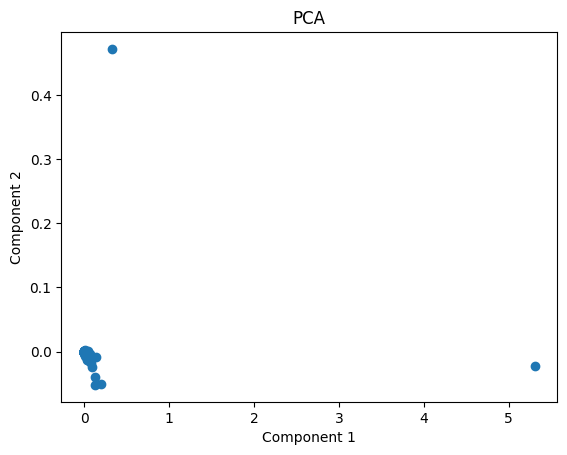

In [100]:
plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()